In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [47]:
img = cv2.imread("./images/lena_salt_512.png", 0)

In [48]:
k = 2
sz = 3
gy = np.array([[-1, 0, 1], [-k, 0, k], [-1, 0, 1]] , dtype = 'float16') 
gx = np.array([[-1, -k, -1], [0, 0, 0], [1, k, 1]] , dtype = 'float16') 

In [49]:
bd = sz // 2
print(bd)

1


In [50]:
f = img.copy().astype(np.float16)

In [51]:
out = np.zeros_like(img, dtype = 'float16')

In [52]:
(m,n) = img.shape
print(m,n,bd)

512 512 1


In [53]:
for i in range(bd,m-bd):
    for j in range(bd,n-bd):
        tgx, tgy = 0, 0
        sub_f = f[i - bd : i + bd + 1, j - bd : j + bd + 1]
        tgx = np.multiply(sub_f, gx).sum() 
        tgy = np.multiply(sub_f, gy).sum()    
        out[i,j] = math.sqrt(math.pow(tgx,2) + math.pow(tgy,2)) 

In [54]:
out = out.astype(np.uint8)
out[out>255] = 255

In [55]:
imgs = cv2.hconcat([img, out])

In [56]:
cv2.imshow("edge image",imgs)
cv2.waitKey(0)
cv2.destroyAllWindows()	

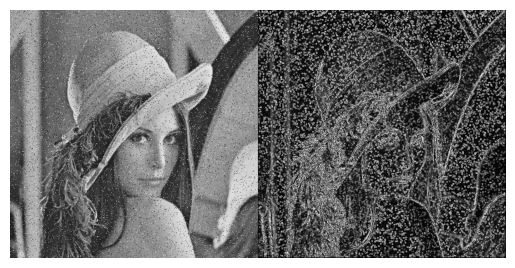

In [57]:
plt.axis("off")
plt.imshow(imgs, cmap='gray')
plt.show()